# Commands for first part

## normalizing data for highc

hifive fends -L genome/mm9.len --binned 100000 gen_part.fend

In [ ]:
(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]hifive hic-data gen_part.fend -X data/WT_100kb/raw_\*.mat interaction_reads.txt

(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]hifive hic-project -f 25 -n 25 -j 100000 -q interaction_reads.txt hic_project.txt

(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]hifive hic-normalize express -f 25 -w cis hic_project.txt

# PLOT

In [1]:
import hifive
readin = hifive.HiC('./hic_project.txt', 'r')
data = readin.cis_heatmap('chr13', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)


Finding fend full array for chr13:1000000-120250001... Done


In [5]:
import matplotlib.pyplot as plt
import numpy as np
Truev = np.where(data[:,:,0:2]>0)
enrichment = data[Truev[0], Truev[1], 0]/ data[Truev[0], Truev[1], 1]

In [6]:

matrix = np.zeros((1193, 1193)) #create an array of 0's = shape of truev data

for x in range(len(enrichment)):
    matrix[Truev[0][x]][Truev[1][x]] = np.log(enrichment[x])

divide by zero encountered in log


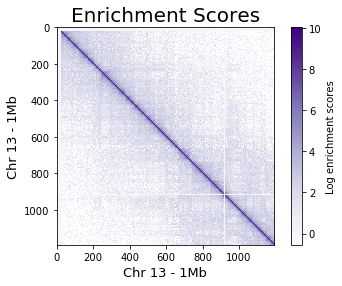

In [14]:
# heatmap
fig, ax = plt.subplots()
im = ax.imshow(matrix, cmap = "Purples")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label("Log enrichment scores")
ax.set_xlabel("Chr 13 - 1Mb", fontsize = 13)
ax.set_ylabel("Chr 13 - 1Mb", fontsize = 13)
ax.set_title("Enrichment Scores", fontsize = 20)
plt.savefig('heatmap.png')

# compartment analysis

In [16]:
Comp = hifive.hic_domains.Compartment(readin, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Finding expected full array for chr13:3000000-120300000... Done
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

#Retreave postion and eigenvalues as x and y

In [17]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']

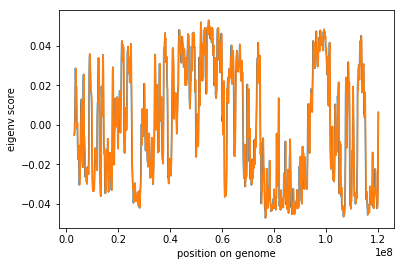

<Figure size 432x288 with 0 Axes>

In [27]:
#plot
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set_xlabel("position on genome")
ax.set_ylabel("eigenv score")

plt.show()
plt.savefig('comp.png')

# Violin

(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]grep -v - hic_comp.bed > pos.bed

(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]grep - hic_comp.bed > neg.bed

(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]bedtools intersect -a data/WT_fpkm.bed -b pos.bed -f 0.5 -wa > pos_overlap.bed
(hifive) [~/qbb2020-answers/QUANT2020/data/lab9]bedtools intersect -a data/WT_fpkm.bed -b neg.bed -f 0.5 -wa > neg_overlap.bed

In [47]:
pos_overlap = open("pos_overlap")
pos_overlap = pos_overlap.readlines()


pos_exp = []
for line in pos_overlap:
    line = line.split()
    pos_exp.append(float(line[-1]))
    
neg_exp = []
neg_overlap = open("neg_overlap")
neg_overlap = neg_overlap.readlines()
for line in neg_overlap:
    line = line.split()
    neg_exp.append(float(line[-1]))

In [51]:
nppos = np.array(pos_exp)
npneg = np.array(neg_exp)

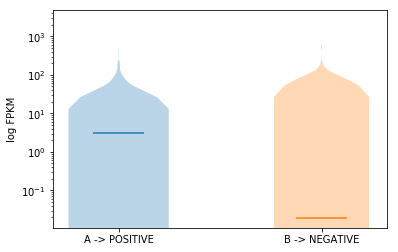

In [82]:
fig, ax = plt.subplots()
ax.violinplot(nppos, positions=[0], showmeans=False, showmedians=True, showextrema=False)
ax.violinplot(npneg, positions=[1], showmeans=False, showmedians=True, showextrema=False)
ax.set_yscale('log')
ax.set_xticks([0, 1])
ax.set_xticklabels(['A -> POSITIVE', 'B -> NEGATIVE'])
ax.set_ylabel("log FPKM")
plt.savefig('violin.png')

# expression

In [68]:
import pyBigWig

pos_bw = []
neg_bw = []
bw = pyBigWig.open('data/WT_H3K27me3.bw')
for gene in pos_overlap:
    line = gene.split()
    coord1 = int(line[1])
    coord2 = int(line[2])
    pos_bw.append(bw.stats('chr13', coord1, coord2, type='sum'))
for gene in neg_overlap:
    line = gene.split()
    coord1 = int(line[1])
    coord2 = int(line[2])
    neg_bw.append(bw.stats('chr13', coord1, coord2, type='sum'))
    


In [72]:
#flatten list of list pos
pos_bw_flat = []
for sublist in pos_bw:
    for item in sublist:
        pos_bw_flat.append(item)

#list comprehention - REMOVE NONE FOR 0
[0 if v is None else v for v in pos_bw_flat]

#flatten list of list neg
neg_bw_flat = []
for sublist in neg_bw:
    for item in sublist:
        neg_bw_flat.append(item)

#list comprehention - REMOVE NONE FOR 0
[0 if v is None else v for v in neg_bw_flat]

[7.479450583457947,
 5.271998167037964,
 3.489296555519104,
 2.4484455585479736,
 3.7948414087295532,
 9.213294625282288,
 1.1952041387557983,
 2.105030655860901,
 3.7683080434799194,
 2.0,
 2.0,
 1.0,
 3.0,
 4.162608742713928,
 1661.0,
 1.0,
 4.6395652294158936,
 4.814361333847046,
 7.535989165306091,
 8.810202360153198,
 4.377156496047974,
 101.0,
 683.0,
 581.0,
 957.0,
 1042.0,
 1179.0,
 268.0,
 168.0,
 959.0,
 330.0,
 694.0,
 832.0,
 326.0,
 295.0,
 542.0,
 284.0,
 200.0,
 172.0,
 690.0,
 413.0,
 404.0,
 564.0,
 581.0,
 151.0,
 256.0,
 3.310116410255432,
 12.783918738365173,
 6.70252799987793,
 7822.0,
 6.933165073394775,
 3.2804877758026123,
 3.3828577995300293,
 3.2018537521362305,
 8.39748239517212,
 6.188507676124573,
 2.875379204750061,
 6.110118985176086,
 7.75848650932312,
 4.55949342250824,
 6.044349551200867,
 7.0419347286224365,
 6.979491353034973,
 5.659203052520752,
 6.43720281124115,
 6.909906387329102,
 8.477882385253906,
 4.938566446304321,
 2.4035874605178833,
 6.4

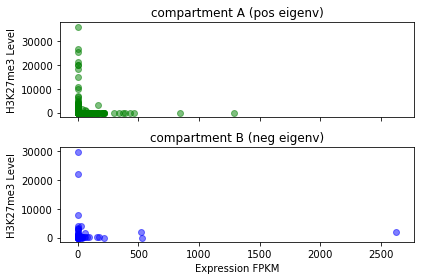

In [91]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].scatter(pos_exp,pos_bw_flat,color='green', alpha=0.5)
ax[1].scatter(neg_exp,neg_bw_flat,color='blue', alpha=0.5)
ax[0].set_title('compartment A (pos eigenv)')
ax[1].set_title('compartment B (neg eigenv)')
ax[1].set_xlabel('Expression FPKM')
ax[1].set_ylabel('H3K27me3 Level')
ax[0].set_ylabel('H3K27me3 Level')
plt.tight_layout()
plt.savefig('expression-H327me3.png')

In [75]:
len(pos_bw_flat)

593

In [76]:
len(pos_exp)

593